In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('Car Sale.csv')
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [163]:
average_price_for_dealer=df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
average_price_for_dealer

,Price ($)
Dealer_Name,
U-Haul CO,28769.919006
Classic Chevy,28602.014446
Rabun Used Car Sales,28527.536177
Iceberg Rentals,28522.958533
Enterprise Rent A Car,28312.580800
Scrivener Performance Engineering,28297.371589
Gartner Buick Hyundai Saab,28247.621019
Saab-Belle Dodge,28190.139888
Capitol KIA,28189.703822


In [164]:
price_variation_by_brand = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
print(price_variation_by_brand)


Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64


In [165]:
trans_p_d=df.groupby('Transmission')['Price ($)'].describe()[['25%', '75%']]
trans_p_d
Q1=trans_p_d['25%']
Q3=trans_p_d['75%']
IQR=Q3-Q1
IQR

,0
Transmission,
Auto,16500.0
Manual,17000.0


In [166]:
df_price_region=df.groupby('Dealer_Region')['Price ($)'].median()
df_price_region

,Price ($)
Dealer_Region,
Aurora,23000.0
Austin,23801.0
Greenville,22500.0
Janesville,23000.0
Middletown,22750.0
Pasco,23000.0
Scottsdale,22600.0


In [167]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [168]:
df_price_style=df.groupby('Body Style')['Price ($)'].median()
df_price_style

,Price ($)
Body Style,
Hardtop,24000.0
Hatchback,22000.0
Passenger,24000.0
SUV,22350.0
Sedan,25000.0


In [169]:
averfage_price_by_gender=df.groupby("Gender")["Price ($)"].std()
averfage_price_by_gender

,Price ($)
Gender,
Female,15150.053072
Male,14688.956304


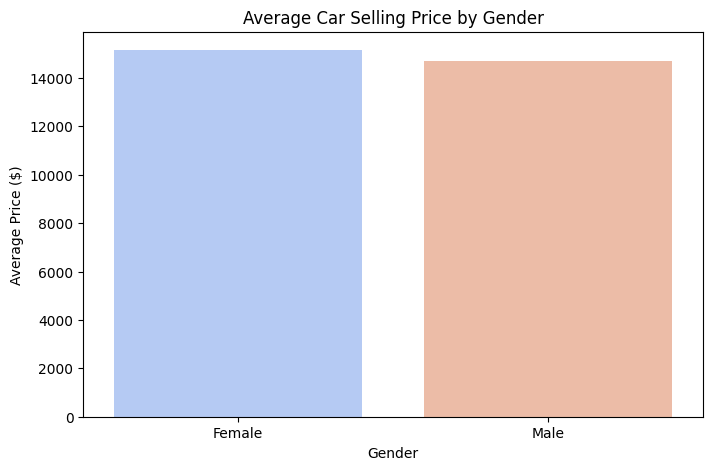

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x=averfage_price_by_gender.index, y=averfage_price_by_gender.values, palette="coolwarm")
plt.title("Average Car Selling Price by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Price ($)")
plt.show()


as we can see there is no major difference as per gender so we can say prices not vary as per the gender

In [171]:


bins = [0, 30000, 60000, 90000, 120000, 150000, 200000]
labels = ['<30k', '30k-60k', '60k-90k', '90k-120k', '120k-150k', '150k+']
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=bins, labels=labels)


# Calculate mean selling price for each income group
avg_price_by_income = df.groupby('Income Bracket')['Price ($)'].mean()

avg_price_by_income.fillna(0, inplace=True)
print(avg_price_by_income)


Income Bracket
<30k         27884.29782
30k-60k          0.00000
60k-90k      43000.00000
90k-120k     46001.00000
120k-150k    17500.00000
150k+        22650.40000
Name: Price ($), dtype: float64


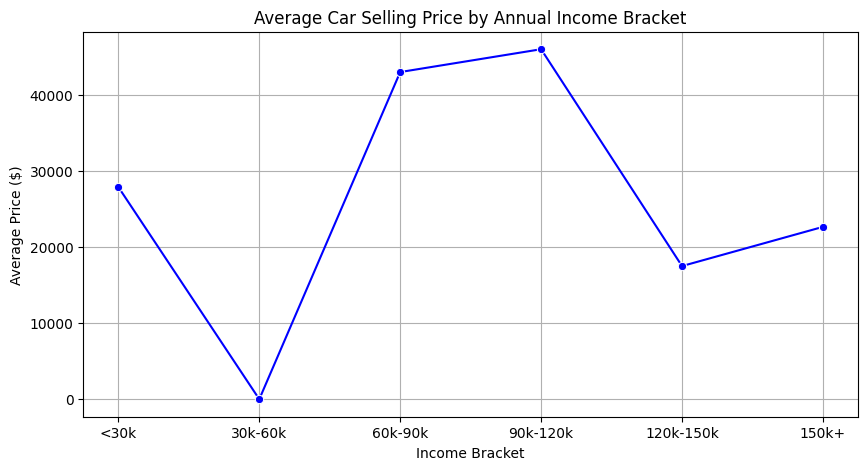

In [172]:
plt.figure(figsize=(10,5))
sns.lineplot(x=avg_price_by_income.index, y=avg_price_by_income.values, marker='o', color='b')
plt.title("Average Car Selling Price by Annual Income Bracket")
plt.xlabel("Income Bracket")
plt.ylabel("Average Price ($)")
plt.grid(True)
plt.show()


this shows that people whose anual income is more like to purchase more costly cars  people who have anual income of between 30K-60K dont purchase any car while people who have income less then 30k goes for cars price between 20k$ to 30k$

In [173]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income Bracket'],
      dtype='object')

In [174]:
df_price_region=df.groupby('Dealer_Region')['Price ($)'].median()
df_price_sale=df.groupby('Dealer_Region')['Price ($)'].std()

df_price_region
df_price_sale



,Price ($)
Dealer_Region,
Aurora,15026.207252
Austin,14903.884549
Greenville,15101.538328
Janesville,14344.995638
Middletown,14619.842395
Pasco,14659.315941
Scottsdale,14902.916820


In [175]:
sales_by_region=df.Dealer_Region.value_counts()
sales_by_region



,count
Dealer_Region,
Austin,4135
Janesville,3821
Scottsdale,3433
Pasco,3131
Aurora,3130
Middletown,3128
Greenville,3128


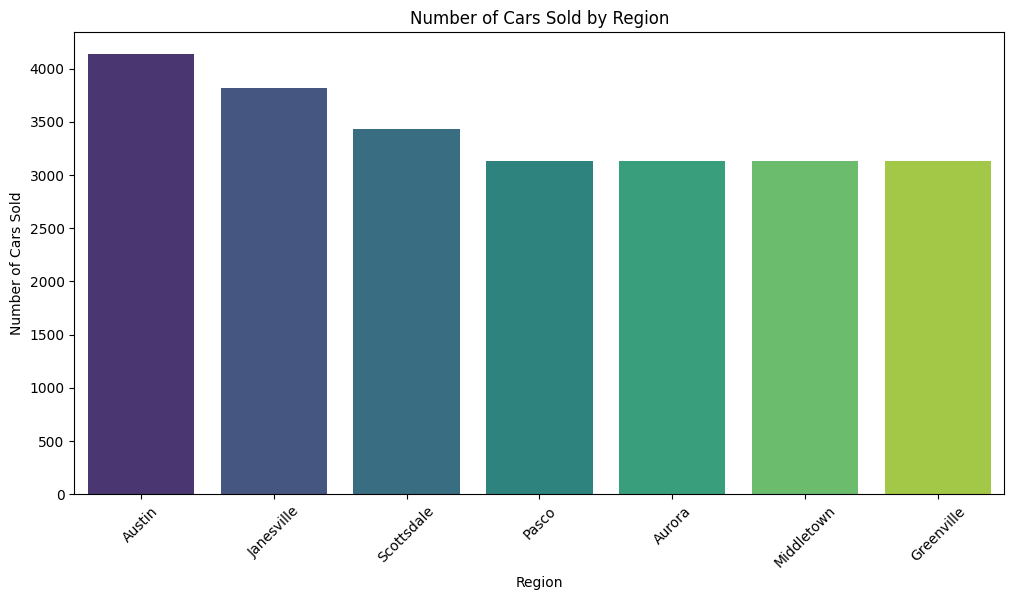

In [176]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Dealer_Region', data=df, order=df['Dealer_Region'].value_counts().index,palette="viridis")
plt.xticks(rotation=45)
plt.title("Number of Cars Sold by Region")
plt.ylabel("Number of Cars Sold")
plt.xlabel("Region")
plt.show()
#variation in sales as per region

as we can see Austin have highest Janesville And Scottsdale are top 2nd and top 3rd have highest sale while pasco,Aurora,middletown,greenville have on average similar sale

In [177]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income Bracket'],
      dtype='object')

In [178]:
df.groupby('Engine')['Price ($)'].mean()

,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


In [179]:
avg_price_by_engine = df.groupby("Engine")["Price ($)"].mean()

# Display the result
print(avg_price_by_engine)

Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


In [180]:
df["Price ($)"].dtype

dtype('int64')

In [181]:
df.Engine

,Engine
0,DoubleÂ Overhead Camshaft
1,DoubleÂ Overhead Camshaft
2,Overhead Camshaft
3,Overhead Camshaft
4,DoubleÂ Overhead Camshaft
...,...
23901,Overhead Camshaft
23902,DoubleÂ Overhead Camshaft
23903,Overhead Camshaft
23904,DoubleÂ Overhead Camshaft


In [182]:
avg_price_by_engine_asper_annualincome = df.groupby("Income Bracket")["Price ($)"].mean()
avg_price_by_engine_asper_annualincome

,Price ($)
Income Bracket,
<30k,27884.29782
30k-60k,NaN
60k-90k,43000.00000
90k-120k,46001.00000
120k-150k,17500.00000
150k+,22650.40000


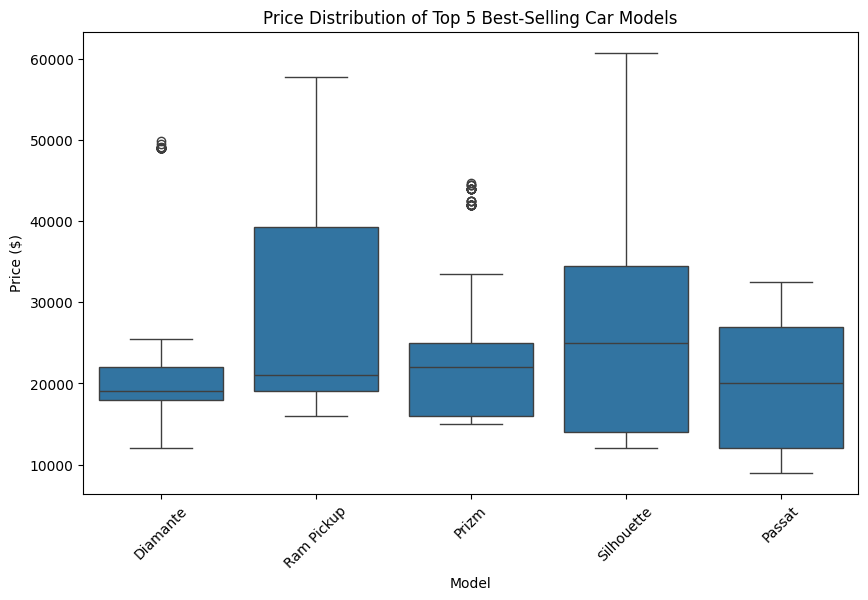

In [183]:
Top_5_sales = df.Model.value_counts().head().index
Top_5_sales
df_top_models = df[df["Model"].isin(Top_5_sales)]
df_top_models
plt.figure(figsize=(10,6))
sns.boxplot(x="Model", y="Price ($)", data=df_top_models)
plt.title("Price Distribution of Top 5 Best-Selling Car Models")
plt.xticks(rotation=45)
plt.show()


In [184]:
df.Engine

,Engine
0,DoubleÂ Overhead Camshaft
1,DoubleÂ Overhead Camshaft
2,Overhead Camshaft
3,Overhead Camshaft
4,DoubleÂ Overhead Camshaft
...,...
23901,Overhead Camshaft
23902,DoubleÂ Overhead Camshaft
23903,Overhead Camshaft
23904,DoubleÂ Overhead Camshaft


In [185]:


# Group by Engine and Color, then calculate the mean price
price_variation = df.groupby(["Engine", "Color"])["Price ($)"].agg(['mean', 'std']).reset_index()

# Identify colors with the highest price variation
highest_variation = price_variation.groupby("Color")["std"].mean().sort_values(ascending=False)

# Display results
print("Average Car Price by Engine Size and Color:")
print(price_variation)

print("\nColors with the Highest Price Variation:")
print(highest_variation.head(5))


Average Car Price by Engine Size and Color:
                      Engine       Color          mean           std
0  DoubleÂ Overhead Camshaft       Black  25766.451103  12418.674126
1  DoubleÂ Overhead Camshaft  Pale White  30347.987460  14402.413401
2  DoubleÂ Overhead Camshaft         Red  27434.392314  13499.354247
3          Overhead Camshaft       Black  31732.967164  17457.405345
4          Overhead Camshaft  Pale White  24327.767694  13000.103061
5          Overhead Camshaft         Red  30153.405229  17346.642554

Colors with the Highest Price Variation:
Color
Red           15422.998401
Black         14938.039736
Pale White    13701.258231
Name: std, dtype: float64


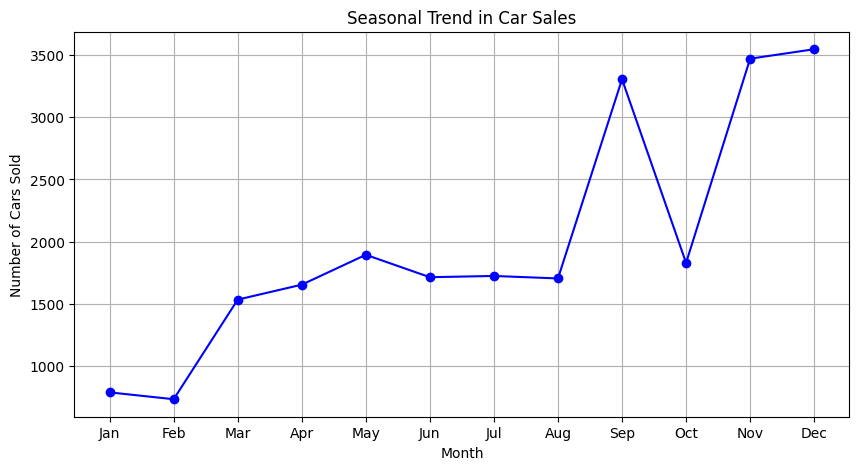

Car sales per month:
Month
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
Name: count, dtype: int64


In [186]:


# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Extract month and count sales
df["Month"] = df["Date"].dt.month
monthly_sales = df["Month"].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(10,5))
plt.plot(monthly_sales.index, monthly_sales.values, marker="o", linestyle="-", color="b")
plt.xticks(range(1,13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.title("Seasonal Trend in Car Sales")
plt.grid()
plt.show()

print("Car sales per month:")
print(monthly_sales)


In [187]:
df.Engine

,Engine
0,DoubleÂ Overhead Camshaft
1,DoubleÂ Overhead Camshaft
2,Overhead Camshaft
3,Overhead Camshaft
4,DoubleÂ Overhead Camshaft
...,...
23901,Overhead Camshaft
23902,DoubleÂ Overhead Camshaft
23903,Overhead Camshaft
23904,DoubleÂ Overhead Camshaft


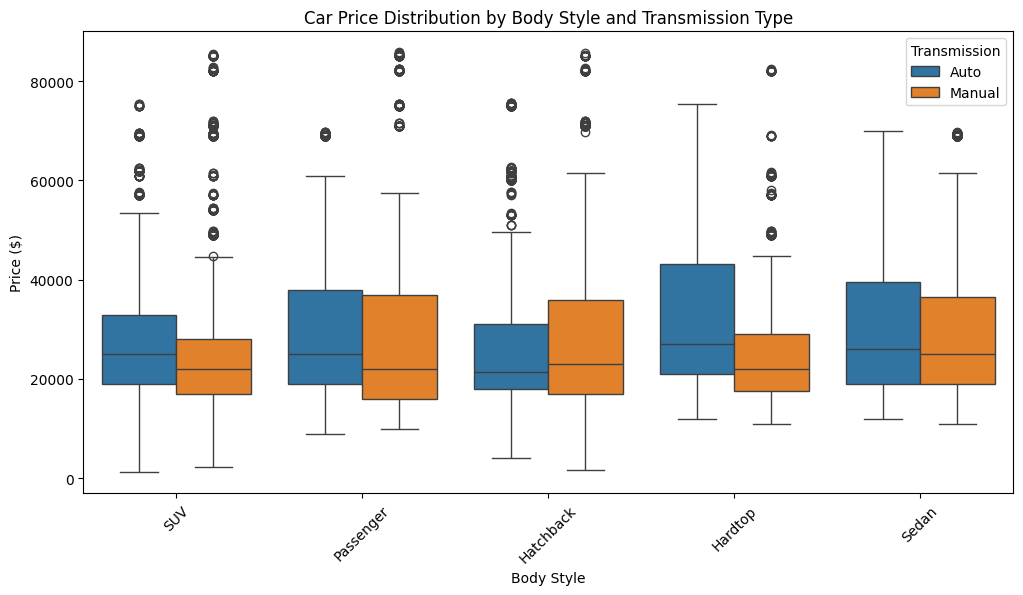

Car Price Distribution Statistics:
                          count          mean           std      min      25%  \
Body Style Transmission                                                         
Hardtop    Auto          1408.0  31520.188210  13687.756740  12000.0  21001.0   
           Manual        1563.0  27016.943698  14072.501848  11000.0  17575.5   
Hatchback  Auto          3458.0  25910.544824  13144.014337   4200.0  18001.0   
           Manual        2670.0  28702.550562  16284.049616   1700.0  17000.0   
Passenger  Auto          2020.0  28915.835149  13946.481932   9000.0  19000.0   
           Manual        1925.0  28969.521039  18523.684163  10000.0  16001.0   
SUV        Auto          3086.0  27501.404407  13299.927913   1200.0  19000.0   
           Manual        3288.0  26079.019161  14621.526541   2200.0  17000.0   
Sedan      Auto          2599.0  29955.294344  14310.910860  12000.0  19000.0   
           Manual        1889.0  29664.271572  15440.056434  11000.0  1900

In [188]:

# Group by Body Style and Transmission Type
price_distribution = df.groupby(["Body Style", "Transmission"])["Price ($)"].describe()

# Plot price distribution
plt.figure(figsize=(12,6))
sns.boxplot(x="Body Style", y="Price ($)", hue="Transmission", data=df)
plt.xticks(rotation=45)
plt.title("Car Price Distribution by Body Style and Transmission Type")
plt.show()

print("Car Price Distribution Statistics:")
print(price_distribution)


In [189]:
# Compute average car price by Model and Engine
avg_price_model_engine = df.groupby(["Model", "Engine"])["Price ($)"].mean()

# Use unstack() instead of pivot()
pivot_table = avg_price_model_engine.unstack(level="Engine")

# Display results
print("Average Car Price by Model and Engine Type:")
print(pivot_table)


Average Car Price by Model and Engine Type:
Engine    DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                 
3-Sep                  37986.380117                NaN
3000GT                 22764.326923       21770.659864
300M                   21394.888889                NaN
323i                   16744.632287       21038.162162
328i                   21069.149606       38676.177215
...                             ...                ...
Viper                  32118.479167       26052.375000
Voyager                22066.026316       33995.678322
Windstar               25145.636364       17100.272727
Wrangler               21145.294737       18742.942029
Xterra                 15940.459459       31072.500000

[154 rows x 2 columns]


['DoubleÂ\xa0Overhead Camshaft' 'Overhead Camshaft']


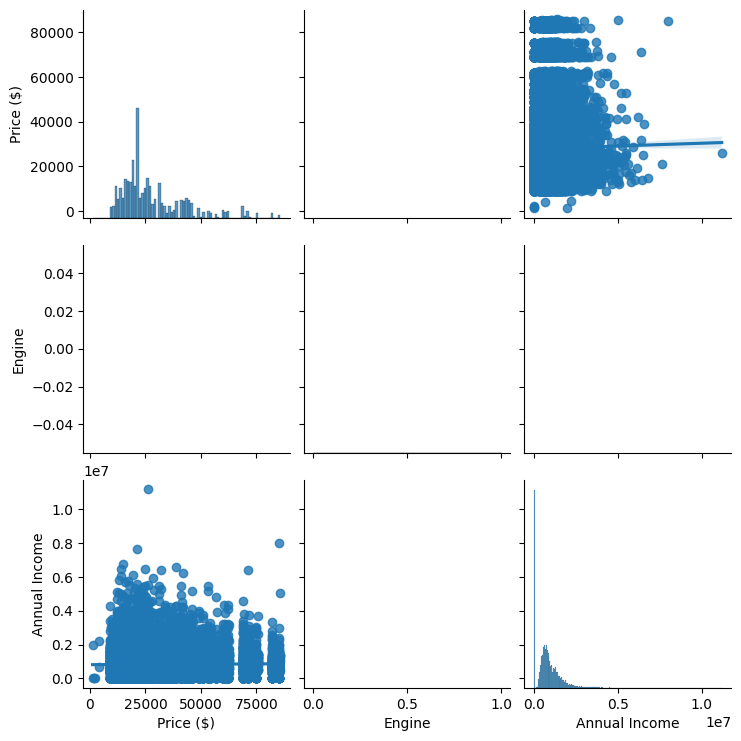

Correlation Matrix:
               Price ($)  Engine  Annual Income
Price ($)       1.000000     NaN       0.012065
Engine               NaN     NaN            NaN
Annual Income   0.012065     NaN       1.000000


In [190]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check what values exist in Engine column
print(df["Engine"].unique())

# Extract numerical values from Engine
df["Engine"] = df["Engine"].astype(str).str.extract(r"(\d+(\.\d+)?)")[0]  # Extracts decimal numbers
df["Engine"] = pd.to_numeric(df["Engine"], errors="coerce")  # Converts to float

# Convert 'Annual Income' to float (handling commas)
df["Annual Income"] = df["Annual Income"].astype(str).str.replace(",", "").astype(float)

# Compute correlation matrix
correlation_matrix = df[["Price ($)", "Engine", "Annual Income"]].corr()

# Scatter plot to visualize interaction
sns.pairplot(df, vars=["Price ($)", "Engine", "Annual Income"], kind="reg")
plt.show()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


In [191]:
print(df["Engine"].unique())  # Check if there are any unexpected values
print(df[["Model", "Engine"]].head(10))  # Inspect some values


[nan]
        Model  Engine
0  Expedition     NaN
1     Durango     NaN
2    Eldorado     NaN
3      Celica     NaN
4          TL     NaN
5    Diamante     NaN
6     Corolla     NaN
7      Galant     NaN
8      Malibu     NaN
9      Escort     NaN


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Car_id          23906 non-null  object        
 1   Date            23906 non-null  datetime64[ns]
 2   Customer Name   23905 non-null  object        
 3   Gender          23906 non-null  object        
 4   Annual Income   23906 non-null  float64       
 5   Dealer_Name     23906 non-null  object        
 6   Company         23906 non-null  object        
 7   Model           23906 non-null  object        
 8   Engine          0 non-null      float64       
 9   Transmission    23906 non-null  object        
 10  Color           23906 non-null  object        
 11  Price ($)       23906 non-null  int64         
 12  Dealer_No       23906 non-null  object        
 13  Body Style      23906 non-null  object        
 14  Phone           23906 non-null  int64         
 15  De

In [193]:
df.Engine

,Engine
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
23901,NaN
23902,NaN
23903,NaN
23904,NaN
